In [1]:
import pandas as mulgul_engpd

mulgul_eng = mulgul_engpd.read_csv('mulgul_eng.csv',nrows=30000) # read English data
mulgul_eng

,text,label
0,comment expected barack obama members fyf fuky...,1
1,post votes hillary already,1
2,demonstrators gathered last night exercising c...,1
3,dozen politically active pastors came private ...,0
4,rs sarmat missile dubbed satan replace ss flie...,1
...,...,...
29995,washington reuters u president donald trump fa...,0
29996,thank goodness mandatory financial disclosures...,1
29997,washington reuters vice president mike pence t...,0
29998,share joe giambrone everything printed year do...,1


In [2]:
import pandas as mulgul_engpd

mulgul_ger = mulgul_engpd.read_csv('mulgul_german.csv',nrows=30000)
mulgul_ger

,Body,Fake
0,sondierungsgespr che union spd endeten komprom...,1
1,medizinisch offiziell best tigt milit r rztlic...,1
2,z he verhandlungen freien demokraten k nnen zu...,1
3,treibt immer sp t nacht herum joachim sauer be...,1
4,parteivorstand dr ckt nochmal auge nachdem noa...,1
...,...,...
29995,krisengebeutelte europ ische automobilmarkt ta...,0
29996,us kabelkonzern liberty global bieterrennen ka...,0
29997,angesichts tiefen rezession euro zone fasst ez...,0
29998,commerzbank fallen n chsten jahren voraussicht...,0


In [3]:
mulgul_eng['label'].value_counts()

0    15432
1    14568
Name: label, dtype: int64

In [4]:
mulgul_ger['Fake'].value_counts()

0    27960
1     2040
Name: Fake, dtype: int64

In [5]:
mulgul_engX = mulgul_eng.drop('label',axis=1)
mulgul_engX

,text
0,comment expected barack obama members fyf fuky...
1,post votes hillary already
2,demonstrators gathered last night exercising c...
3,dozen politically active pastors came private ...
4,rs sarmat missile dubbed satan replace ss flie...
...,...
29995,washington reuters u president donald trump fa...
29996,thank goodness mandatory financial disclosures...
29997,washington reuters vice president mike pence t...
29998,share joe giambrone everything printed year do...


In [6]:
mulgul_engY = mulgul_eng['label']
mulgul_engY

0        1
1        1
2        1
3        0
4        1
        ..
29995    0
29996    1
29997    0
29998    1
29999    0
Name: label, Length: 30000, dtype: int64

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer as mulgul_engcvt

mulgul_eng_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_engX = mulgul_eng_AY.fit_transform(mulgul_eng['text'].values.astype('U')).toarray()

In [8]:
print(mulgul_engX)

[[0.57892077 0.2611502  0.0672667  ... 0.01424629 0.06197869 0.00488827]
 [0.39981329 0.39977331 0.         ... 0.         0.26913124 0.        ]
 [0.4510741  0.24806595 0.         ... 0.02669597 0.02277278 0.        ]
 ...
 [0.49078218 0.26848079 0.05059424 ... 0.00420957 0.04488672 0.        ]
 [0.52501742 0.28544968 0.04668153 ... 0.00699124 0.07222846 0.00799625]
 [0.51391005 0.24052959 0.0296293  ... 0.01294247 0.04416186 0.01973731]]


In [9]:
mulgul_gerX = mulgul_ger.drop('Fake',axis=1)
mulgul_gerX

,Body
0,sondierungsgespr che union spd endeten komprom...
1,medizinisch offiziell best tigt milit r rztlic...
2,z he verhandlungen freien demokraten k nnen zu...
3,treibt immer sp t nacht herum joachim sauer be...
4,parteivorstand dr ckt nochmal auge nachdem noa...
...,...
29995,krisengebeutelte europ ische automobilmarkt ta...
29996,us kabelkonzern liberty global bieterrennen ka...
29997,angesichts tiefen rezession euro zone fasst ez...
29998,commerzbank fallen n chsten jahren voraussicht...


In [10]:
mulgul_gerY = mulgul_ger['Fake']
mulgul_gerY

0        1
1        1
2        1
3        1
4        1
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Fake, Length: 30000, dtype: int64

In [11]:
mulgul_ger_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_gerX = mulgul_ger_AY.fit_transform(mulgul_ger['Body'].values.astype('U')).toarray()

In [12]:
print(mulgul_gerX)

[[0.43000932 0.20495771 0.04822856 ... 0.00622332 0.01132334 0.03620037]
 [0.51844098 0.16040163 0.05442561 ... 0.0133067  0.00807052 0.03440158]
 [0.53275549 0.1717627  0.03202569 ... 0.         0.         0.07284391]
 ...
 [0.47660857 0.19210243 0.07052332 ... 0.0037656  0.         0.09005003]
 [0.44799407 0.2315475  0.14598533 ... 0.         0.01418283 0.06045607]
 [0.48860776 0.19906242 0.06635856 ... 0.         0.         0.08452394]]


In [13]:
from imblearn.over_sampling import RandomOverSampler as mulgul_gerrmo
from collections import Counter as mulgul_gerctr
print('In starting mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))
Mdd= mulgul_gerrmo()
mulgul_gerX, mulgul_gerY = Mdd.fit_resample(mulgul_gerX, mulgul_gerY)
print('After applying random oversampling mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))

In starting mulgul_ger datashape Counter({0: 27960, 1: 2040})
After applying random oversampling mulgul_ger datashape Counter({1: 27960, 0: 27960})


In [14]:
from sklearn.model_selection import train_test_split as mulgul_engnst
from sklearn.metrics import classification_report as mulgul_engcla
from sklearn.metrics import confusion_matrix as mulgul_engcon
from sklearn.metrics import ConfusionMatrixDisplay as mulgul_engcma
import time as mulgul_engtim
from sklearn.model_selection import GridSearchCV as mulgul_enggri
from sklearn.ensemble import VotingClassifier as mulgul_engvtg
import numpy as mulgul_engny
from sklearn.svm import SVC as mulgul_engsvet
from sklearn.naive_bayes import GaussianNB as mulgulnvbs
from sklearn.tree import DecisionTreeClassifier as mulguldesi
from sklearn.ensemble import RandomForestClassifier as mulgulromf
from sklearn.neighbors import KNeighborsClassifier as mulgulkgh
from sklearn.neural_network import MLPClassifier as mulgulmlt

In [15]:
ger_rast= 42
ger_tze=0.5
# {{{test,validation=50%,50%}}}
mulgul_gerXL, mulgul_gerXE, mulgul_gerYL, mulgul_gerYE = mulgul_engnst(mulgul_gerX, mulgul_gerY, test_size= ger_tze, random_state= ger_rast)

In [16]:
print(mulgul_gerXL.shape)
print(mulgul_gerXE.shape)

(27960, 27)
(27960, 27)


In [17]:
import warnings as mulgul_engww
mulgul_engww.filterwarnings("ignore")

#### Voting algorithm

#### SVM & Naive bayes

In [18]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgul_engsvet(C=2.0,gamma='scale',kernel='rbf')

mulgul_Mll2 = mulgulnvbs(var_smoothing=1e-09)

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print("Best parameters-mulgul_eng :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_eng : {'voting': 'hard'}
Best Score :  0.6133333333333333


In [19]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 54.47314977645874 

              precision    recall  f1-score   support

           0       0.82      0.05      0.10     14006
           1       0.51      0.99      0.67     13954

    accuracy                           0.52     27960
   macro avg       0.67      0.52      0.39     27960
weighted avg       0.67      0.52      0.38     27960


 validation duration : 49.39089298248291 



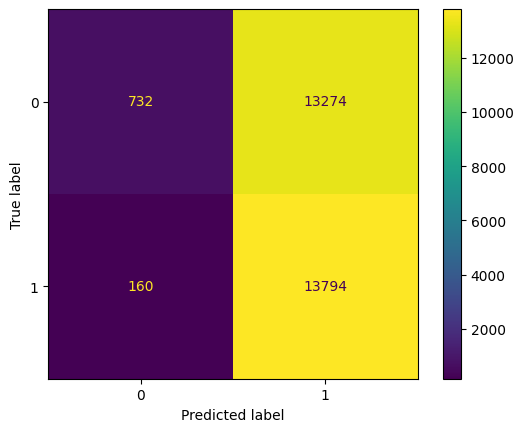

In [20]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2)], voting='hard')
mulgul_Mll.fit(mulgul_engX,mulgul_engY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.82      0.05      0.10     13954
           1       0.51      0.99      0.67     14006

    accuracy                           0.52     27960
   macro avg       0.67      0.52      0.39     27960
weighted avg       0.67      0.52      0.39     27960


 testing duration : 48.16839289665222 



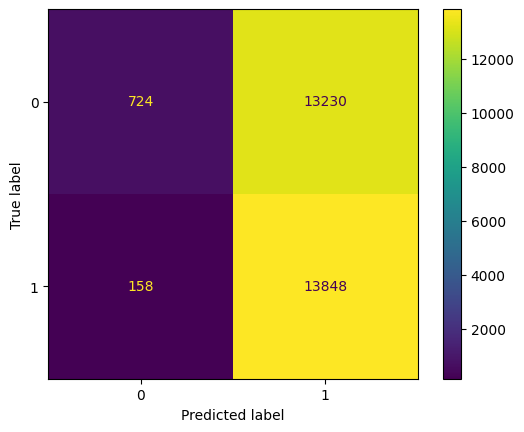

In [21]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Naive bayes & Decision tree

In [22]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulnvbs(var_smoothing=1e-09)

mulgul_Mll2 = mulguldesi(criterion='gini',max_features='sqrt',splitter='best')

mulgul_Mll = mulgul_engvtg(estimators=[('NB', mulgul_Mll1), ('DT', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print("Best parameters-mulgul_eng :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_eng : {'voting': 'soft'}
Best Score :  0.5743333333333334


In [23]:
mulgul_Bst_Mll.best_params_

{'voting': 'soft'}


 training duration : 0.3736889362335205 

              precision    recall  f1-score   support

           0       0.52      0.23      0.32     14006
           1       0.51      0.79      0.62     13954

    accuracy                           0.51     27960
   macro avg       0.52      0.51      0.47     27960
weighted avg       0.52      0.51      0.47     27960


 validation duration : 0.1389937400817871 



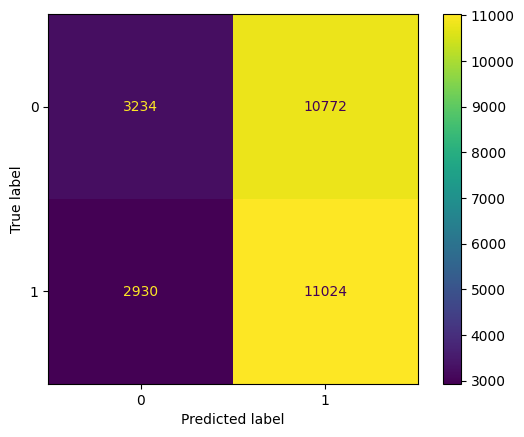

In [24]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('NB', mulgul_Mll1), ('DT', mulgul_Mll2)], voting='soft')
mulgul_Mll.fit(mulgul_engX,mulgul_engY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.50      0.22      0.30     13954
           1       0.50      0.79      0.61     14006

    accuracy                           0.50     27960
   macro avg       0.50      0.50      0.46     27960
weighted avg       0.50      0.50      0.46     27960


 testing duration : 0.14098072052001953 



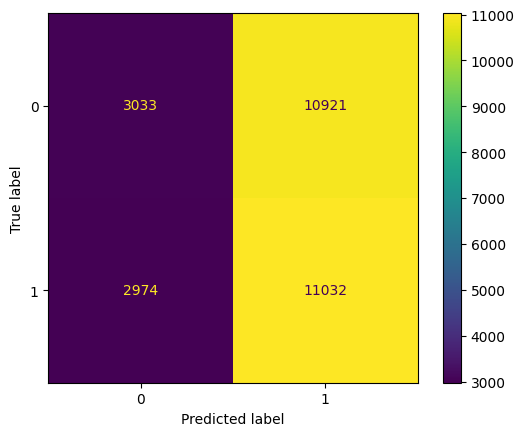

In [25]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Decision tree & Random forest

In [26]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulguldesi(criterion='gini',max_features='sqrt',splitter='best')

mulgul_Mll2 = mulgulromf(criterion='gini',max_features='log2',n_estimators=200)

mulgul_Mll = mulgul_engvtg(estimators=[('DT', mulgul_Mll1), ('RF', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print("Best parameters-mulgul_eng :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_eng : {'voting': 'hard'}
Best Score :  0.645


In [27]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 37.76397633552551 

              precision    recall  f1-score   support

           0       0.57      0.28      0.38     14006
           1       0.52      0.79      0.63     13954

    accuracy                           0.53     27960
   macro avg       0.54      0.53      0.50     27960
weighted avg       0.54      0.53      0.50     27960


 validation duration : 0.9556410312652588 



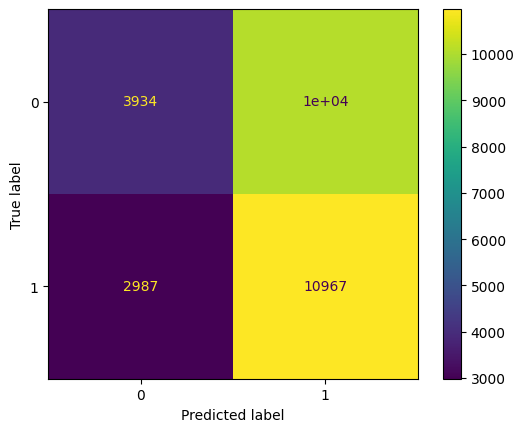

In [28]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('DT', mulgul_Mll1), ('RF', mulgul_Mll2)], voting='hard')
mulgul_Mll.fit(mulgul_engX,mulgul_engY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.56      0.28      0.37     13954
           1       0.52      0.78      0.62     14006

    accuracy                           0.53     27960
   macro avg       0.54      0.53      0.50     27960
weighted avg       0.54      0.53      0.50     27960


 testing duration : 1.1464910507202148 



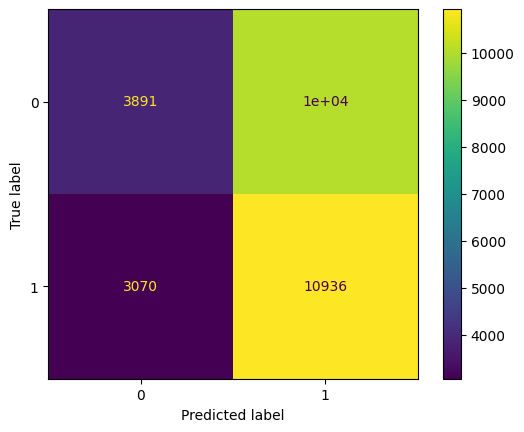

In [29]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Random forest & KNN

In [30]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulromf(criterion='gini',max_features='log2',n_estimators=200)

mulgul_Mll2 = mulgulkgh(algorithm='ball_tree',n_neighbors=8,weights='distance')

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print("Best parameters-mulgul_eng :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_eng : {'voting': 'soft'}
Best Score :  0.6796666666666666


In [31]:
mulgul_Bst_Mll.best_params_

{'voting': 'soft'}


 training duration : 52.461891174316406 

              precision    recall  f1-score   support

           0       0.80      0.04      0.08     14006
           1       0.51      0.99      0.67     13954

    accuracy                           0.51     27960
   macro avg       0.65      0.51      0.37     27960
weighted avg       0.65      0.51      0.37     27960


 validation duration : 67.01520490646362 



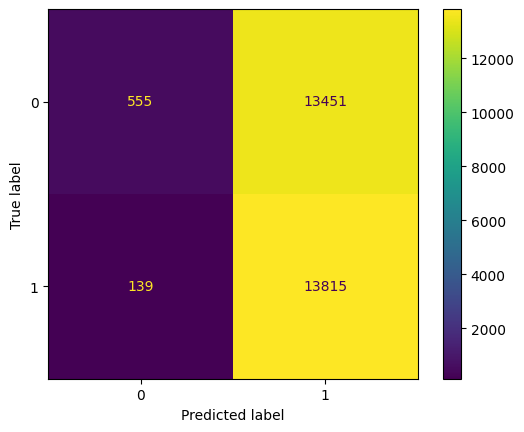

In [32]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2)], voting='soft')
mulgul_Mll.fit(mulgul_engX,mulgul_engY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.79      0.04      0.07     13954
           1       0.51      0.99      0.67     14006

    accuracy                           0.51     27960
   macro avg       0.65      0.51      0.37     27960
weighted avg       0.65      0.51      0.37     27960


 testing duration : 71.46445608139038 



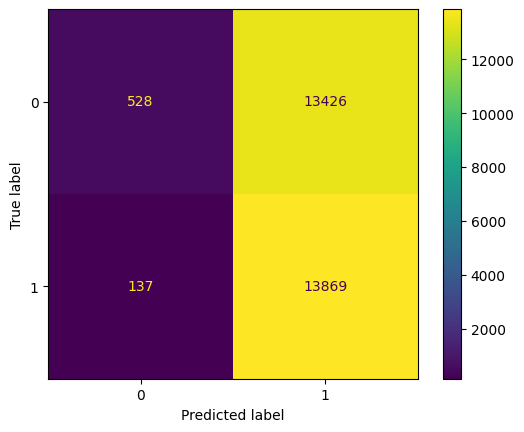

In [33]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### KNN & MLP

In [34]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulkgh(algorithm='ball_tree',n_neighbors=8,weights='distance')

mulgul_Mll2 = mulgulmlt(activation='logistic',learning_rate='constant',solver='adam')

mulgul_Mll = mulgul_engvtg(estimators=[('KNN', mulgul_Mll1), ('MLP', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print("Best parameters-mulgul_eng :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_eng : {'voting': 'soft'}
Best Score :  0.667


In [35]:
mulgul_Bst_Mll.best_params_

{'voting': 'soft'}


 training duration : 41.64416289329529 

              precision    recall  f1-score   support

           0       0.77      0.06      0.11     14006
           1       0.51      0.98      0.67     13954

    accuracy                           0.52     27960
   macro avg       0.64      0.52      0.39     27960
weighted avg       0.64      0.52      0.39     27960


 validation duration : 63.201839208602905 



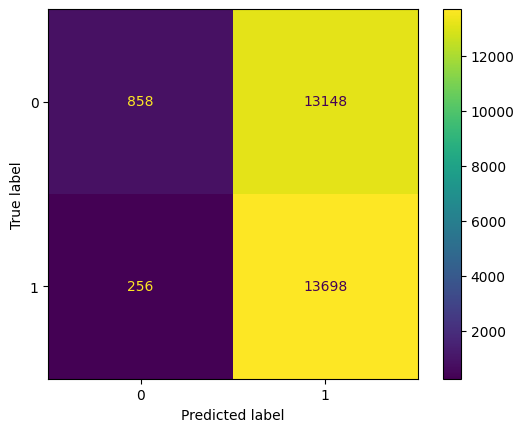

In [36]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('KNN', mulgul_Mll1), ('MLP', mulgul_Mll2)], voting='soft')
mulgul_Mll.fit(mulgul_engX,mulgul_engY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.76      0.06      0.11     13954
           1       0.51      0.98      0.67     14006

    accuracy                           0.52     27960
   macro avg       0.64      0.52      0.39     27960
weighted avg       0.64      0.52      0.39     27960


 testing duration : 65.54244995117188 



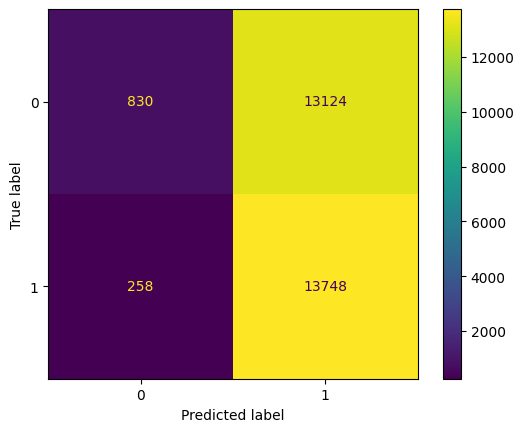

In [37]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### SVM, Naive bayes & Decision tree

In [38]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgul_engsvet(C=2.0,gamma='scale',kernel='rbf')

mulgul_Mll2 = mulgulnvbs(var_smoothing=1e-09)

mulgul_Mll3 = mulguldesi(criterion='gini',max_features='sqrt',splitter='best')

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2), ('DT', mulgul_Mll3)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print("Best parameters-mulgul_eng :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_eng : {'voting': 'hard'}
Best Score :  0.6693333333333333


In [39]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 53.421154499053955 

              precision    recall  f1-score   support

           0       0.82      0.04      0.08     14006
           1       0.51      0.99      0.67     13954

    accuracy                           0.52     27960
   macro avg       0.66      0.52      0.37     27960
weighted avg       0.66      0.52      0.37     27960


 validation duration : 49.44715595245361 



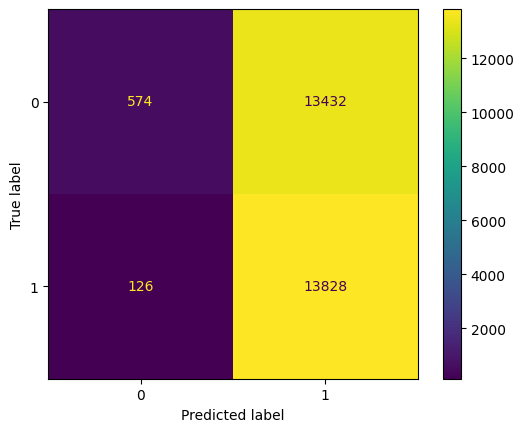

In [40]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2), ('DT', mulgul_Mll3)], voting='hard')
mulgul_Mll.fit(mulgul_engX,mulgul_engY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.82      0.04      0.08     13954
           1       0.51      0.99      0.67     14006

    accuracy                           0.52     27960
   macro avg       0.67      0.52      0.38     27960
weighted avg       0.67      0.52      0.38     27960


 testing duration : 48.52042365074158 



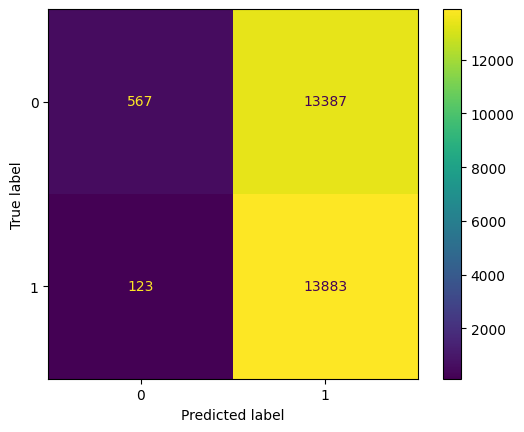

In [41]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Random forest, KNN & MLP

In [42]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulromf(criterion='gini',max_features='log2',n_estimators=200)

mulgul_Mll2 = mulgulkgh(algorithm='ball_tree',n_neighbors=8,weights='distance')

mulgul_Mll3 = mulgulmlt(activation='logistic',learning_rate='constant',solver='adam')

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2), ('MLP', mulgul_Mll3)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print("Best parameters-mulgul_eng :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_eng : {'voting': 'hard'}
Best Score :  0.6963333333333332


In [43]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 83.0557873249054 

              precision    recall  f1-score   support

           0       0.79      0.08      0.15     14006
           1       0.51      0.98      0.67     13954

    accuracy                           0.53     27960
   macro avg       0.65      0.53      0.41     27960
weighted avg       0.65      0.53      0.41     27960


 validation duration : 69.45622897148132 



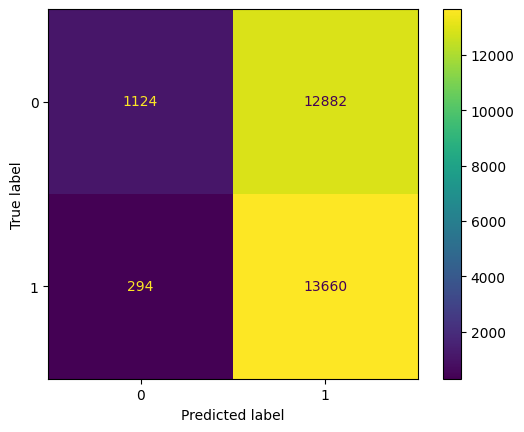

In [44]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2), ('MLP', mulgul_Mll3)], voting='hard')
mulgul_Mll.fit(mulgul_engX,mulgul_engY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.79      0.08      0.14     13954
           1       0.52      0.98      0.68     14006

    accuracy                           0.53     27960
   macro avg       0.65      0.53      0.41     27960
weighted avg       0.65      0.53      0.41     27960


 testing duration : 67.21222972869873 



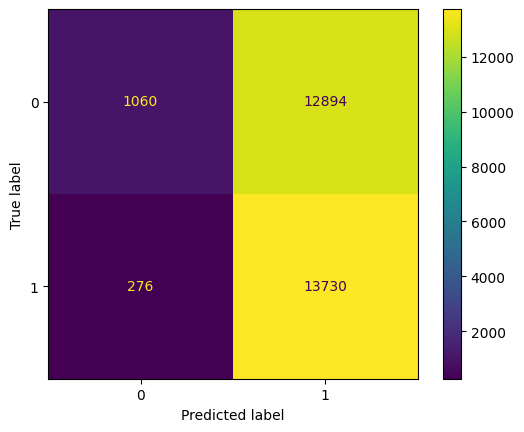

In [45]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")